In [1]:
import matplotlib
matplotlib.use("Agg")
from PIL import Image
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import Adagrad
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from cancernet.cancernet import CancerNet
from cancernet import config
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


In [2]:
config.TRAIN_PATH

'F:/Neeraj/breast-cancer-classification/datasets/idc\\training'

In [3]:
NUM_EPOCHS=2; INIT_LR=1e-2; BS=32

trainPaths=list(paths.list_images(config.TRAIN_PATH))
lenTrain=len(trainPaths)
lenVal=len(list(paths.list_images(config.VAL_PATH)))
lenTest=len(list(paths.list_images(config.TEST_PATH)))


In [4]:
from keras import utils as ut
trainLabels=[int(p.split(os.path.sep)[-2]) for p in trainPaths]
if np.any(trainLabels):
    trainLabels = ut.to_categorical(trainLabels,num_classes=None)

In [11]:
classTotals=np.array(trainLabels).sum(axis=0)
classWeight=classTotals.max()/classTotals

In [5]:
trainAug = ImageDataGenerator(
	rescale=1/255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.05,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

valAug=ImageDataGenerator(rescale=1 / 255.0)

In [6]:
valAug=ImageDataGenerator(rescale=1 / 255.0)
#print("hello1")
trainGen = trainAug.flow_from_directory(
	config.TRAIN_PATH,
	class_mode="categorical",
	target_size=(48,48),
	color_mode="rgb",
	shuffle=True,
	batch_size=BS)

Found 202778 images belonging to 2 classes.


In [7]:
#print("hello2")
valGen = valAug.flow_from_directory(
	config.VAL_PATH,
	class_mode="categorical",
	target_size=(48,48),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

Found 23803 images belonging to 2 classes.


In [8]:
#print("hello3")
testGen = valAug.flow_from_directory(
	config.TEST_PATH,
	class_mode="categorical",
	target_size=(48,48),
	color_mode="rgb",
	shuffle=False,
	batch_size=BS)

Found 59075 images belonging to 2 classes.


In [9]:
#print("hello4")
model=CancerNet.build(width=48,height=48,depth=3,classes=2)
#print("hello5")
opt=Adagrad(lr=INIT_LR,decay=INIT_LR/NUM_EPOCHS)
#print("hello6")
model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
#print("hello7")

In [12]:
M=model.fit_generator(
	trainGen,
	steps_per_epoch=lenTrain//BS,
	validation_data=valGen,
	validation_steps=lenVal//BS,
	class_weight=classWeight,
	epochs=NUM_EPOCHS)

Epoch 1/2
1521/6336 [======>.......................] - ETA: 2:48:27 - loss: 0.4324 - accuracy: 0.8208

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 5423 could not be retrieved. It could be because a worker has died.
  UserWarning)


1874/6336 [=======>......................] - ETA: 2:43:45 - loss: 0.4280 - accuracy: 0.8210

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 4896 could not be retrieved. It could be because a worker has died.
  UserWarning)


2105/6336 [========>.....................] - ETA: 2:41:09 - loss: 0.4247 - accuracy: 0.8219

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 5076 could not be retrieved. It could be because a worker has died.
  UserWarning)


2179/6336 [=========>....................] - ETA: 2:39:32 - loss: 0.4234 - accuracy: 0.8225

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1451 could not be retrieved. It could be because a worker has died.
  UserWarning)


3154/6336 [=============>................] - ETA: 2:13:21 - loss: 0.4156 - accuracy: 0.8247

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 2651 could not be retrieved. It could be because a worker has died.
  UserWarning)


3164/6336 [=============>................] - ETA: 2:15:52 - loss: 0.4155 - accuracy: 0.8247

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 5176 could not be retrieved. It could be because a worker has died.
  UserWarning)


3215/6336 [==============>...............] - ETA: 2:19:45 - loss: 0.4153 - accuracy: 0.8247

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 5506 could not be retrieved. It could be because a worker has died.
  UserWarning)


3216/6336 [==============>...............] - ETA: 2:20:24 - loss: 0.4152 - accuracy: 0.8247

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 3336 could not be retrieved. It could be because a worker has died.
  UserWarning)


3217/6336 [==============>...............] - ETA: 2:21:09 - loss: 0.4151 - accuracy: 0.8248

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 6234 could not be retrieved. It could be because a worker has died.
  UserWarning)


3352/6336 [==============>...............] - ETA: 2:15:44 - loss: 0.4136 - accuracy: 0.8256

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 993 could not be retrieved. It could be because a worker has died.
  UserWarning)


3673/6336 [================>.............] - ETA: 2:04:47 - loss: 0.4111 - accuracy: 0.8268

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 2105 could not be retrieved. It could be because a worker has died.
  UserWarning)


3820/6336 [=================>............] - ETA: 2:00:11 - loss: 0.4096 - accuracy: 0.8275

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 5834 could not be retrieved. It could be because a worker has died.
  UserWarning)


3975/6336 [=================>............] - ETA: 1:54:44 - loss: 0.4086 - accuracy: 0.8278

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 3593 could not be retrieved. It could be because a worker has died.
  UserWarning)


4322/6336 [===================>..........] - ETA: 1:39:20 - loss: 0.4082 - accuracy: 0.8276

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1458 could not be retrieved. It could be because a worker has died.
  UserWarning)


5186/6336 [=======================>......] - ETA: 54:40 - loss: 0.4055 - accuracy: 0.8286

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1519 could not be retrieved. It could be because a worker has died.
  UserWarning)


5306/6336 [========================>.....] - ETA: 48:57 - loss: 0.4049 - accuracy: 0.8288

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 206 could not be retrieved. It could be because a worker has died.
  UserWarning)


5365/6336 [========================>.....] - ETA: 46:14 - loss: 0.4049 - accuracy: 0.8287

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 4533 could not be retrieved. It could be because a worker has died.
  UserWarning)


6336/6336 [==============================] - 19183s 3s/step - loss: 0.4018 - accuracy: 0.8300 - val_loss: 0.2584 - val_accuracy: 0.7608
Epoch 2/2
1823/6336 [=======>......................] - ETA: 3:22:03 - loss: 0.3857 - accuracy: 0.8364

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 480 could not be retrieved. It could be because a worker has died.
  UserWarning)


1824/6336 [=======>......................] - ETA: 3:24:20 - loss: 0.3859 - accuracy: 0.8364

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1750 could not be retrieved. It could be because a worker has died.
  UserWarning)


3792/6336 [================>.............] - ETA: 1:40:55 - loss: 0.3854 - accuracy: 0.8361

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 257 could not be retrieved. It could be because a worker has died.
  UserWarning)


4527/6336 [====================>.........] - ETA: 1:08:36 - loss: 0.3847 - accuracy: 0.8364

C:\Users\ACER\AppData\Roaming\Python\Python36\site-packages\keras\utils\data_utils.py:616: UserWarning: The input 1368 could not be retrieved. It could be because a worker has died.
  UserWarning)


6336/6336 [==============================] - 13876s 2s/step - loss: 0.3835 - accuracy: 0.8371 - val_loss: 0.1912 - val_accuracy: 0.7556


In [23]:
#print("hello8")
print("Now evaluating the model")
testGen.reset()
pred_indices=model.predict_generator(testGen,steps=(lenTest//BS)+1)

pred_indices=np.argmax(pred_indices,axis=1)
print("evaluation completed")


Now evaluating the model
evaluation completed


In [26]:
print(classification_report(testGen.classes, pred_indices, target_names=testGen.class_indices.keys()))



              precision    recall  f1-score   support

           0       0.95      0.70      0.81     42428
           1       0.54      0.90      0.68     16647

   micro avg       0.76      0.76      0.76     59075
   macro avg       0.75      0.80      0.74     59075
weighted avg       0.83      0.76      0.77     59075



In [27]:
cm=confusion_matrix(testGen.classes,pred_indices)
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print(cm)
print(f'Accuracy: {accuracy}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')

[[29731 12697]
 [ 1619 15028]]
Accuracy: 0.7576639864578925
Specificity: 0.9027452393824713
Sensitivity: 0.7007400773074385


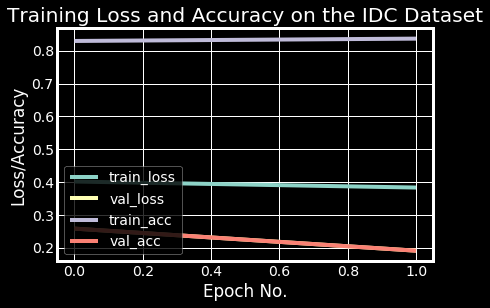

In [44]:
%matplotlib inline
N = NUM_EPOCHS
plt.style.use("fivethirtyeight")
plt.style.use('dark_background')
plt.figure()
plt.plot(np.arange(0,N), M.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), M.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), M.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0,N), M.history["val_acc"], label="val_acc")
plt.plot(np.arange(0,N), M.history["val_loss"], label="val_acc")
plt.title("Training Loss and Accuracy on the IDC Dataset")
plt.xlabel("Epoch No.")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('plot.png')
